In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import imblearn
import statsmodels.api as sm
import warnings
from impyute.imputation.cs import mice
warnings.filterwarnings(action='ignore')
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [2]:
train = pd.read_csv("./train (2).csv")
test = pd.read_csv("./test.csv")

In [66]:
total = pd.concat([train, test], axis=0, ignore_index=True)
total = total.drop(['id'], axis=1)
total

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_160,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,18,NaN,NaN,1,198,1
1,city_90,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,NaN,NaN,1,149,0
2,city_114,0.926,NaN,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,never,9,0
3,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,5,0
4,city_100,0.887,Male,Has relevent experience,Full time course,NaN,NaN,14,NaN,NaN,1,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,100-500,Pvt Ltd,1,312,0
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,19,100-500,Pvt Ltd,2,48,0
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,100-500,Funded Startup,1,8,0
19156,city_73,0.754,NaN,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,>4,134,0


In [9]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

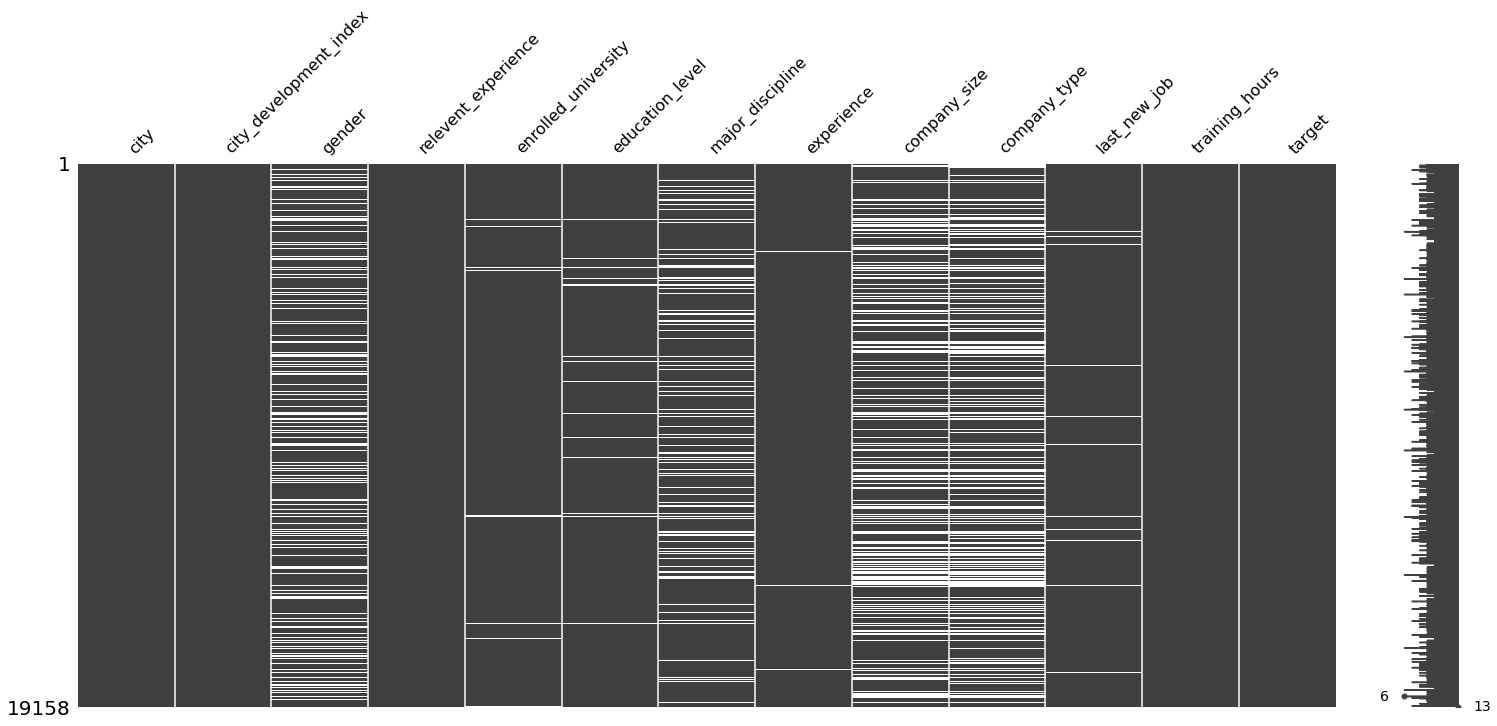

In [67]:
import missingno as msno
msno.matrix(total)

In [68]:
dummy = pd.get_dummies(total)

In [69]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [70]:

total_impute = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(dummy))
total_impute

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.920,198.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.698,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.926,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.926,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.887,43.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.920,312.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
19154,0.920,48.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
19155,0.920,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19156,0.754,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
total_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Columns: 187 entries, 0 to 186
dtypes: float64(187)
memory usage: 27.3 MB


In [72]:
df = total_impute
df1 = total_impute.iloc[17158:,:]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Columns: 187 entries, 0 to 186
dtypes: float64(187)
memory usage: 27.3 MB


In [74]:
y_df = df['target']
X_df = df.drop('target', axis=1)
y_df1 = df1['target']
X_df1 = df1.drop('target', axis=1)

KeyError: 'target'

In [3]:
df = pd.concat([train, test], axis=0, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [4]:
df.drop(['id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [5]:
df['experience'] = df['experience'].map({'<1' : 0, '1' : 1, '2' : 2, '3' : 3, '4' : 4, '5': 5, '6': 6, '7' : 7, '8' : 8, '9' : 9, '10':10, '11' : 11, '12':12, '13': 13, '14':14, '15': 15, '16' : 16, '17':17, '18':18, '19':19, '20': 20, '>20' : 23})

In [6]:
df = pd.get_dummies(df, columns=['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Columns: 166 entries, city_development_index to last_new_job_never
dtypes: float64(2), int64(2), uint8(162)
memory usage: 3.5 MB


In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_imputer = IterativeImputer()
df_mice = df.copy()
df_mice.iloc[:, :] = mice_imputer.fit_transform(df_mice)

In [9]:
df_mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Columns: 166 entries, city_development_index to last_new_job_never
dtypes: float64(166)
memory usage: 24.3 MB


In [10]:
df = df_mice.iloc[:17518, :]
df1 = df_mice.iloc[17518:, :]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17518 entries, 0 to 17517
Columns: 166 entries, city_development_index to last_new_job_never
dtypes: float64(166)
memory usage: 22.2 MB


In [12]:
df.head()

,city_development_index,experience,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,18.0,198.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.698,7.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.926,3.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.926,15.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.887,14.0,43.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

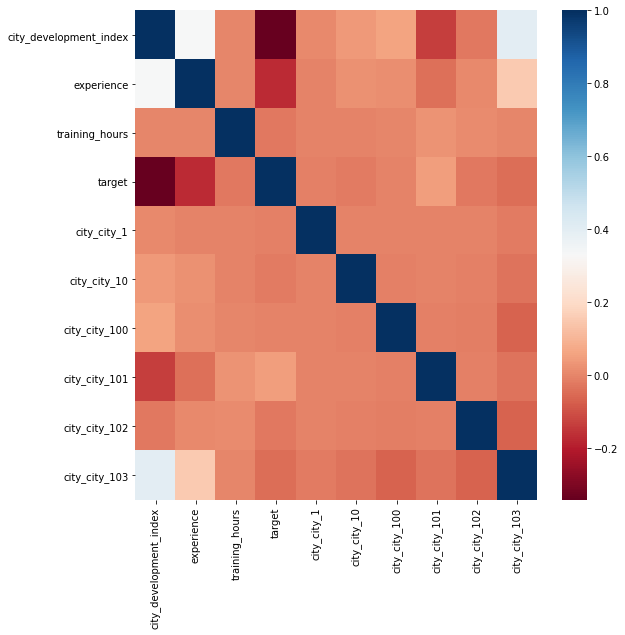

In [13]:
plt.figure(figsize=(9, 9))
corr = df.iloc[:, :10].corr()
sns.heatmap(corr, cmap='RdBu')

In [14]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['target']==0][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index
print(df['target'].value_counts())

outlier_index = get_outlier(df=df, column='city_development_index', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)
df.drop(outlier_index, axis=0, inplace=True)

0.0    13159
1.0     4359
Name: target, dtype: int64
이상치 데이터 인덱스: Int64Index([    8,    16,    26,    48,    50,    53,    63,    69,    75,
               94,
            ...
            17378, 17412, 17425, 17440, 17454, 17463, 17473, 17474, 17479,
            17516],
           dtype='int64', length=1291)


In [15]:
y_df = df['target']
X_df = df.drop('target', axis=1)
y_df1 = df1['target']
X_df1 = df1.drop('target', axis=1)

In [16]:
standardScaler = StandardScaler()
standardScaler.fit(X_df.iloc[:, 0:3])

X_df.iloc[:, 0:3] = np.log1p(X_df.iloc[:, 0:3])
y_df

X_df1.iloc[:, 0:3] = np.log1p(X_df1.iloc[:, 0:3])
X_df1.head()

,city_development_index,experience,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
17518,0.643432,0.000000,4.727388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17519,0.662172,3.178054,4.672829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17520,0.561899,1.609438,4.394449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17521,0.590006,2.079442,1.098612,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17522,0.652325,2.302585,3.555348,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Class=1, n=4359 (26.863%)
Class=0, n=11868 (73.137%)


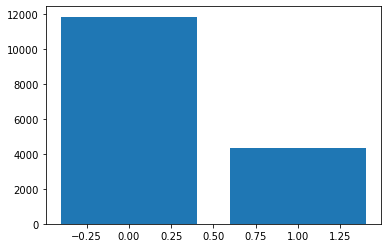

In [17]:
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

count_and_plot(y_df)

Class=1, n=11868 (50.000%)
Class=0, n=11868 (50.000%)


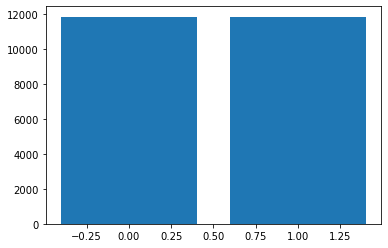

In [18]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X_df, y_df)
count_and_plot(y_resampled)

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X_resampled, y_resampled, \
                                                  test_size=0.2, random_state=11)


In [20]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_df1)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_df1, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_df1)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_df1, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_df1)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_df1, lr_pred)))

DecisionTreeClassifier 정확도: 0.7287
RandomForestClassifier 정확도:0.7848
LogisticRegression 정확도: 0.7799


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [22]:
rf_clf1 = RandomForestClassifier(n_estimators=500, max_depth=45, min_samples_leaf=2, \
                                 min_samples_split=2)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_df1)
rf_pred_proba = rf_clf1.predict_proba(X_df1)[:, 1]
get_clf_eval(y_df1, rf_pred, rf_pred_proba)

오차 행렬
[[1029  193]
 [ 160  258]]
정확도: 0.7848, 정밀도: 0.5721, 재현율: 0.6172,    F1: 0.5938, AUC:0.7847


In [23]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [24]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_df1, \
                     tgt_train=y_train, tgt_test=y_df1)


오차 행렬
[[1024  198]
 [ 164  254]]
정확도: 0.7793, 정밀도: 0.5619, 재현율: 0.6077,    F1: 0.5839, AUC:0.7779


In [25]:
lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_df1)
lr_pred_proba = lr_clf.predict_proba(X_df1)[:, 1]
get_clf_eval(y_df1, pred, lr_pred_proba)

오차 행렬
[[964 258]
 [103 315]]
정확도: 0.7799, 정밀도: 0.5497, 재현율: 0.7536,    F1: 0.6357, AUC:0.7917


In [34]:
import statsmodels.api as sm
logit = sm.Logit(y_df,X_df) #로지스틱 회귀분석 시행
results = logit.fit(method='bfgs')

         Current function value: 0.360765
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


In [35]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
====================================================================================
Model:                     Logit                  Pseudo R-squared:       0.380     
Dependent Variable:        target                 AIC:                    12032.2649
Date:                      2021-07-17 16:44       BIC:                    13278.7629
No. Observations:          16227                  Log-Likelihood:         -5854.1   
Df Model:                  161                    LL-Null:                -9442.3   
Df Residuals:              16065                  LLR p-value:            0.0000    
Converged:                 0.0000                 Scale:                  1.0000    
------------------------------------------------------------------------------------
                                             Coef.  Std.Err.  z  P>|z| [0.025 0.975]
------------------------------------------------------------------------------------
city_development_index                      -2.2168      nan nan   nan    nan    nan
experience                                  -0.1106      nan nan   nan    nan    nan
training_hours                               0.0291      nan nan   nan    nan    nan
city_city_1                                 -0.1155      nan nan   nan    nan    nan
city_city_10                                -0.2004      nan nan   nan    nan    nan
city_city_100                                0.0284      nan nan   nan    nan    nan
city_city_101                                0.7884      nan nan   nan    nan    nan
city_city_102                               -0.5210      nan nan   nan    nan    nan
city_city_103                               -0.1229      nan nan   nan    nan    nan
city_city_104                               -0.8484      nan nan   nan    nan    nan
city_city_105                               -0.2675      nan nan   nan    nan    nan
city_city_106                                0.0068      nan nan   nan    nan    nan
city_city_107                                0.0585      nan nan   nan    nan    nan
city_city_109                                0.0074      nan nan   nan    nan    nan
city_city_11                                 2.4651      nan nan   nan    nan    nan
city_city_111                               -0.0377      nan nan   nan    nan    nan
city_city_114                               -1.2503      nan nan   nan    nan    nan
city_city_115                                0.0782      nan nan   nan    nan    nan
city_city_116                               -0.2372      nan nan   nan    nan    nan
city_city_117                               -0.0051      nan nan   nan    nan    nan
city_city_118                                0.0516      nan nan   nan    nan    nan
city_city_12                                -0.0619      nan nan   nan    nan    nan
city_city_120                                0.0012      nan nan   nan    nan    nan
city_city_121                                0.0022      nan nan   nan    nan    nan
city_city_123                               -0.0622      nan nan   nan    nan    nan
city_city_126                                0.3280      nan nan   nan    nan    nan
city_city_127                               -0.0282      nan nan   nan    nan    nan
city_city_128                                0.9648      nan nan   nan    nan    nan
city_city_129                                0.0000      nan nan   nan    nan    nan
city_city_13                                -0.1844      nan nan   nan    nan    nan
city_city_131                                0.0313      nan nan   nan    nan    nan
city_city_133                               -0.0160      nan nan   nan    nan    nan
city_city_134                               -0.0449      nan nan   nan    nan    nan
city_city_136                               -1.4262      nan nan   nan    nan    nan
city_city_138                               -0.4179      nan nan   nan    na